In [3]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import re
import string
import nltk
import warnings
warnings.filterwarnings("ignore")
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [5]:
#input data yang ingin dicleansing
def load_data():
    data = pd.read_csv('data.csv', encoding='latin-1')
    return data

In [6]:
df = load_data()
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [19]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [20]:
df.shape

(13169, 13)

In [21]:
#menghilangkan data duplikat
df.drop_duplicates(subset=["Tweet"], keep="first", inplace=True)
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df.shape

(13023, 13)

In [49]:
#Cleansing Data
def cleansing_data (text):
    #case folding (mengubha ke dalam lower case)
    text = text.lower()

    #menghapus kata user
    text = re.sub(r"user", " ", text)
    
    # remove tab, new line, ans back slice
    text = str(text).replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"").replace('\n',"").replace('\ud83d',"").replace('\ude4f',"").replace('\ud83e',"").replace('\udd23',"").replace('\ude2d',"").replace('\udc40',"")
    
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    text = re.sub(r'^rt[\s]+', '', text)
    
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    
    # remove incomplete URL
    text = text.replace("http://", " ").replace("https://", " ")
    
    # remove number
    text = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", text)

    # Remove Punctuation
    text = text.translate(str.maketrans("","",string.punctuation))

    # remove whitespace leading & trailing
    text = text.strip()

    # remove multiple whitespace into single whitespace
    text = re.sub('\s+',' ',text)

    # remove single character
    return re.sub(r"\b[a-zA-Z]\b", "", text)
    

df['Data_Cleansing']= df['Tweet'].apply(cleansing_data)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Data Cleansing,Tokenisasi,Stopwords,Data_Cleansing
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[disaat, cowok, berusaha, melacak, perhatian, ...",disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s...","[telat, ngasih, elu, edan, sarap, gue, bergaul...",siapa yang telat ngasih tau elu edan sarap gue...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, berfikir, percaya, tuhan, jatuh, berk...",kadang aku berfikir kenapa aku tetap percaya p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku ku tau matamu sipit tapi diliat da...,"[aku, itu, aku, ku, tau, matamu, sipit, tapi, ...","[ku, matamu, sipit, diliat]",aku itu aku ku tau matamu sipit tapi diliat da...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny...","[kaum, cebong, kapir, udah, keliatan, dongokny...",kaum cebong kapir udah keliatan dongoknya dari...


In [50]:
df['Data_Cleansing'].head()

0    disaat semua cowok berusaha melacak perhatian ...
1    siapa yang telat ngasih tau elu edan sarap gue...
2    kadang aku berfikir kenapa aku tetap percaya p...
3    aku itu aku ku tau matamu sipit tapi diliat da...
4    kaum cebong kapir udah keliatan dongoknya dari...
Name: Data_Cleansing, dtype: object

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
#Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])
txt_stopword = pd.read_csv("stopwords-id.csv", names=["stopwords"], header=None)

list_stopwords = set(list_stopwords)

def stopwords_removal(text):
    text= [word for word in text if word not in list_stopwords]
    return text

def gabung_stopwords(text):
    text = np.array(text)
    text = ' '.join(text)
    return text


# df['Tokenisasi']= df['Data_Cleansing'].apply(tokenization)
df['Stopwords']= df['Data_Cleansing'].apply(tokenization).apply(stopwords_removal).apply(gabung_stopwords)

# df.drop('Tokenisasi', axis=1, inplace=True)
# df.drop('Stopwords', axis=1, inplace=True)
# df.drop('Data Cleansing', axis=1, inplace=True)

df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Data_Cleansing,Stopwords
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...,disaat cowok berusaha melacak perhatian gue lo...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sarap gue...,telat ngasih elu edan sarap gue bergaul cigax ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya p...,kadang berfikir percaya tuhan jatuh berkali ka...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku ku tau matamu sipit tapi diliat da...,ku matamu sipit diliat
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya dari...,kaum cebong kapir udah keliatan dongoknya dong...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal ngomong ndasmu congor lu yg sekate...,ngomong ndasmu congor lu sekate anjyng
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk,kasur enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu lagi bosan huft xf fx xaa,hati hati bisu bosan huft xf fx xaa
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terkub...,bom real mudah terdeteksi bom terkubur dahsyat...


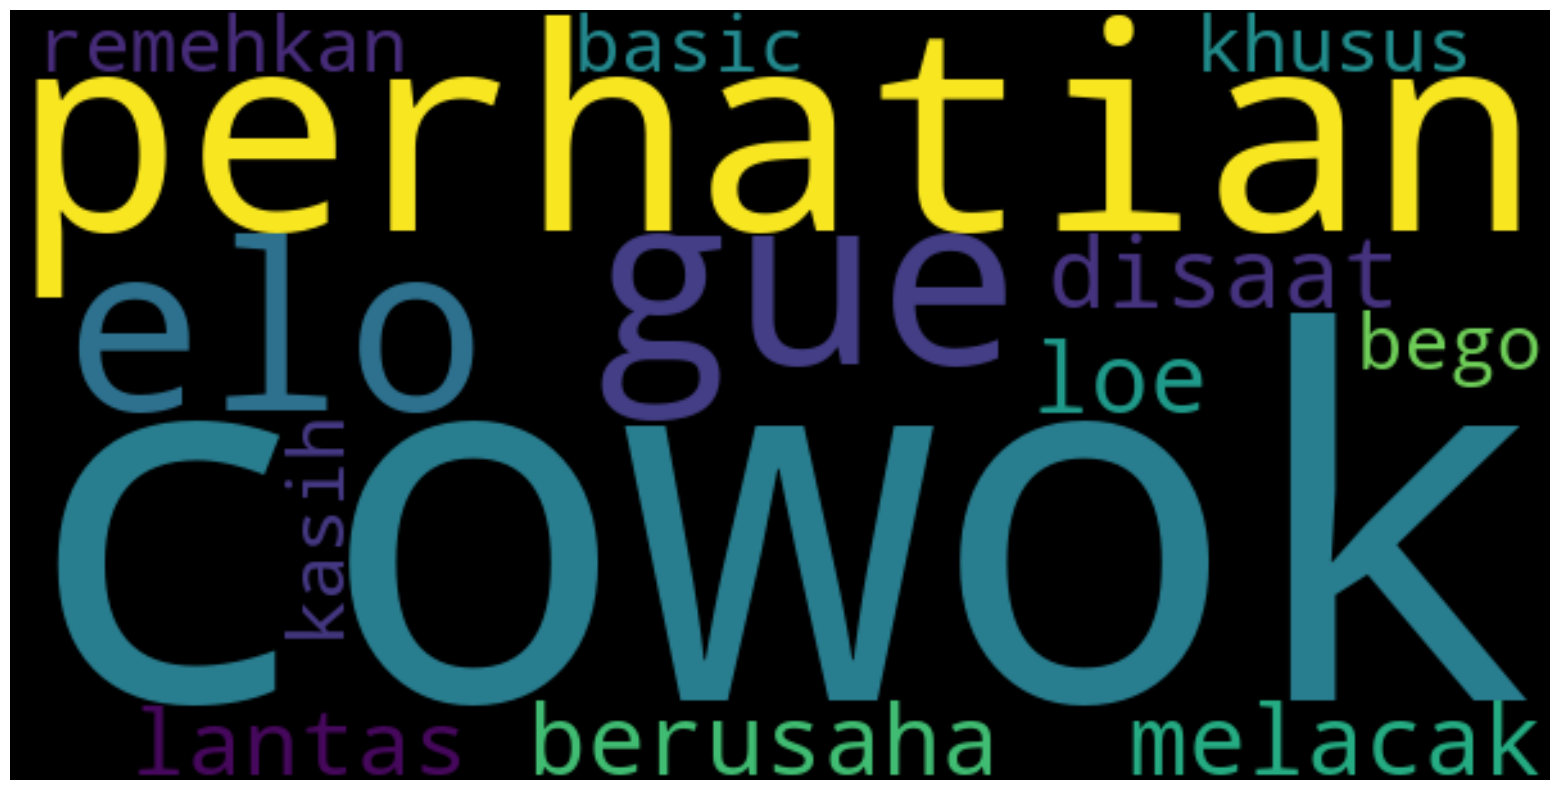

In [61]:

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = df.Stopwords[0]

wordcloud = WordCloud(width = 600, height = 300, random_state = 21, max_font_size = 200, collocations = False).generate(data)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13023 entries, 0 to 13168
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweet           13023 non-null  object
 1   HS              13023 non-null  int64 
 2   Abusive         13023 non-null  int64 
 3   HS_Individual   13023 non-null  int64 
 4   HS_Group        13023 non-null  int64 
 5   HS_Religion     13023 non-null  int64 
 6   HS_Race         13023 non-null  int64 
 7   HS_Physical     13023 non-null  int64 
 8   HS_Gender       13023 non-null  int64 
 9   HS_Other        13023 non-null  int64 
 10  HS_Weak         13023 non-null  int64 
 11  HS_Moderate     13023 non-null  int64 
 12  HS_Strong       13023 non-null  int64 
 13  Data_Cleansing  13023 non-null  object
 14  Stopwords       13023 non-null  object
dtypes: int64(12), object(3)
memory usage: 2.1+ MB


In [65]:
df.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000
mean,0.422407,0.383322,0.270905,0.151501,0.060278,0.043154,0.024495,0.023267,0.283806,0.256162,0.130078,0.036167
std,0.493962,0.486214,0.444444,0.358550,0.238010,0.203212,0.154586,0.150755,0.450861,0.436529,0.336402,0.186712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.skew()

HS               0.314743
Abusive          0.481659
HS_Individual    1.027865
HS_Group         1.951762
HS_Religion      3.697803
HS_Race          4.507363
HS_Physical      6.148549
HS_Gender        6.329997
HS_Other         0.958113
HS_Weak          1.112960
HS_Moderate      2.207621
HS_Strong        4.988423
dtype: float64